In [1]:
import os
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# band11-15

In [2]:
def normalize(record_data):
    MEAN = [274.4108, 255.5268, 276.6016, 275.3604, 272.5643]
    STD = [19.6334, 13.1177, 20.7182, 21.0882, 20.5616]
    N_TIMES_LABELED = 4
    
    band_11 = (record_data["band_11"]-MEAN[0])/STD[0]
    band_12 = (record_data["band_12"]-MEAN[1])/STD[1]
    band_13 = (record_data["band_13"]-MEAN[2])/STD[2]
    band_14 = (record_data["band_14"]-MEAN[3])/STD[3]
    band_15 = (record_data["band_15"]-MEAN[4])/STD[4]
    images = np.stack([band_11, band_12, band_13, band_14, band_15], axis=2)
    images=images[..., N_TIMES_LABELED]

    return images


def read_record(record_id, comp_data_dir, mode):
    record_data = {}
    if mode in ["train", "validation"]:
        bands_mask = ["band_11", "band_12", "band_13", "band_14", "band_15", "human_pixel_masks"]
    if mode in ["test"]:
        bands_mask = ["band_11", "band_12", "band_13", "band_14", "band_15"]

    for x in bands_mask:
        record_data[x] = np.load(os.path.join(comp_data_dir, record_id, x + ".npy"))
    return record_data


def create_dataset(comp_data_dir, dataset_dir, mode):
    os.makedirs(dataset_dir, exist_ok=True)

    input_dir = f"{comp_data_dir}/{mode}"
    record_ids = os.listdir(input_dir)

    df = pd.DataFrame(record_ids, columns=['record_id'])
    df['path'] = dataset_dir + df['record_id'].astype(str) + '.npy'
    df.to_csv(f"{dataset_dir}/{mode}_df.csv", index=False)

    for record_id in tqdm(record_ids):
        record_data = read_record(str(record_id), input_dir, mode)
        images = normalize(record_data)
        if mode in ["train", "validation"]:
            array = np.dstack([images, record_data['human_pixel_masks']])
        if mode in ["test"]:
            array = np.dstack([images])
        array = array.astype(np.float16)

        npy_path = f"{dataset_dir}/{record_id}.npy"
        np.save(str(npy_path), array)

In [3]:
data_dir = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/'
dataset_train = "/kaggle/working/dataset_train/11-15/"
dataset_test = "/kaggle/working/dataset_test/11-15/"

create_dataset(data_dir, dataset_train, "train")
create_dataset(data_dir, dataset_train, "validation")
# # create_dataset(data_dir, dataset_test, "test")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/google-research-identify-contrails-reduce-global-warming//train'

In [40]:
no=15
comp_data_dir = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train'
id_list=os.listdir(comp_data_dir)
record_data=read_record(id_list[no], comp_data_dir, "train")
tmp=normalize(record_data)

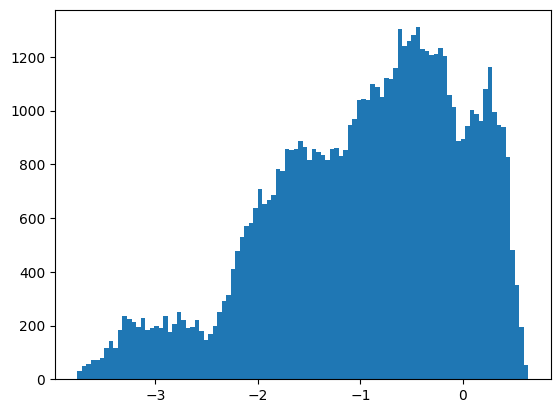

In [41]:
plt.hist(tmp[:,:,4].flatten(), bins=100);